## Regressão linear múltipla

Queremos encontrar uma equação da forma

$$Z = aX + bY + c$$

de forma a se ajustar melhor em um conjunto de dados dado.

In [2]:
import pandas as pd

# Conjunto de dados coletados por Cobb e Douglas
df = pd.DataFrame({
    "X": [100,105,110,117,122,121,125,134,140], # Horas de trabalho
    "Y": [100,107,114,122,131,138,149,163,176], # Investimento
    "Z": [100,101,112,122,124,122,143,152,151], # Produção
})

Podemos visualizar a tabela:

In [3]:
df

,X,Y,Z
0,100,100,100
1,105,107,101
2,110,114,112
3,117,122,122
4,122,131,124
5,121,138,122
6,125,149,143
7,134,163,152
8,140,176,151


Podemos visualizar os dados em um gráfico de dispersão tridimensional.

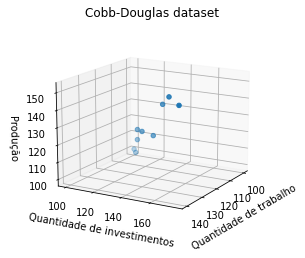

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure() # janela

ax = fig.gca(projection='3d') # utilizando eixos 3D

ax.scatter(df['X'], df['Y'], df['Z'], zdir='z') # gráfico

ax.set_xlabel('Quantidade de trabalho') # rótulo do eixo x
ax.set_ylabel('Quantidade de investimentos') # rótulo do eixo y
ax.set_zlabel('Produção') # rótulo do eixo z
ax.set_title('Cobb-Douglas dataset') # título

ax.view_init(15,30) # ângulos para apresentação do gráfico

plt.show() # mostra gráfico

In [12]:
from sklearn import linear_model

variables = df[['X','Y']]
Z = df['Z']

regr = linear_model.LinearRegression() # criando o modelo
regr.fit(variables, Z) # ajustando o modelo aos dados

print('Constante c: \n', regr.intercept_)
print('Coeficientes a e b: \n', regr.coef_)

Constante c: 
 -1.2905859871538752
Coeficientes a e b: 
 [0.51616284 0.48688032]


Logo a equação desejada fica:

$$Z = 0.51 X + 0.48 Y - 1.29$$

Vejamos o gráfico dessa superfície:

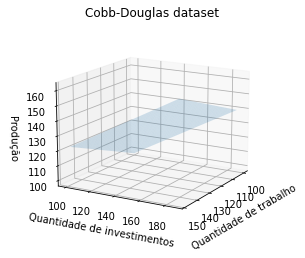

In [19]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure() # janela
ax = fig.gca(projection='3d') # eixos 3D

X = np.arange(100, 150, 2) # X variando de 100 a 150 de 2 em 2
Y = np.arange(100, 190, 3) # Y variando de 100 a 190 de 3 em 3
X, Y = np.meshgrid(X, Y) # criando a grade de pontos
Z = 0.51 * X + 0.48 * Y - 1.29 # calculando Z

# alpha é a transparência da superfície
surf = ax.plot_surface(X, Y, Z, alpha=0.2) # gráfico de superfície

ax.set_xlabel('Quantidade de trabalho') # rótulo do eixo x
ax.set_ylabel('Quantidade de investimentos') # rótulo do eixo y
ax.set_zlabel('Produção') # rótulo do eixo z
ax.set_title('Cobb-Douglas dataset') # título

ax.view_init(15,30) # ângulos para apresentação do gráfico

plt.show() # mostra o gráfico

Por fim, vejamos como fica os pontos e o gráfico junto:

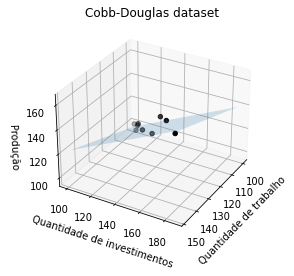

In [17]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure() # janela
ax = fig.gca(projection='3d') # eixos 3D

X = np.arange(100, 150, 2) # X variando de 100 a 150 de 2 em 2
Y = np.arange(100, 190, 3) # Y variando de 100 a 190 de 3 em 3
X, Y = np.meshgrid(X, Y) # criando a grade de pontos
Z = 0.51 * X + 0.48 * Y - 1.29 # calculando Z

# alpha é a transparência da superfície
surf = ax.plot_surface(X, Y, Z, alpha=0.2) # gráfico de superfície

ax.scatter(df['X'], df['Y'], df['Z'], zdir='z', color='k') # gráfico de dispersão

ax.set_xlabel('Quantidade de trabalho') # rótulo do eixo x
ax.set_ylabel('Quantidade de investimentos') # rótulo do eixo y
ax.set_zlabel('Produção') # rótulo do eixo z
ax.set_title('Cobb-Douglas dataset') # título

ax.view_init(30,30) # ângulos para apresentação do gráfico

plt.show() # mostra o gráfico

Visualmente, parece que os dados estão bem próximos do modelo proposto. Que tal estudar métricas para medir a eficiência desse modelo? ( ˘ ³ ˘ )♥